In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
import datetime
from datetime import *
import optuna
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
df = pd.read_csv('C:\\Users\\yashs\\OneDrive\\Desktop\\Machine Learning\\Social Media Tourism project\\With_missing_values_imputed.csv')

In [3]:
df.head()

,buy,following_company_page,Yearly_avg_comment_on_travel_page,preferred_location_type,yearly_avg_Outstation_checkins,total_likes_on_outstation_checkin_given,Yearly_avg_view_on_travel_page,member_in_family,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1,1.0,94.0,Financial,1.0,38570.0,307.0,2,5993,8,11,0,4,0,8
1,0,0.0,61.0,Financial,1.0,9765.0,367.0,1,5130,1,23,1,1,1,10
2,1,1.0,92.0,Other,1.0,48055.0,277.0,2,2090,6,15,0,3,0,7
3,0,1.0,56.0,Financial,1.0,48720.0,247.0,4,2909,1,11,0,2,0,8
4,0,0.0,40.0,Medical,1.0,20685.0,202.0,1,3468,9,12,0,1,1,6


In [4]:
df['preferred_location_type'] = np.where(df['preferred_location_type']=='Tour  Travel','Tour and Travel',df['preferred_location_type'])

### pd.get_dummies

In [5]:
cat_col = df.select_dtypes(exclude=[np.number]).columns.tolist()

In [6]:
df = pd.get_dummies(df,columns=cat_col,drop_first=True)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop('buy',axis=1)
Y = df['buy']

In [9]:
X1,valid_X,Y1,valid_Y = train_test_split(X,Y,test_size=0.1,stratify=Y)

In [10]:
print(X1.shape)
print(Y1.shape)
print(valid_X.shape)
print(valid_Y.shape)

(9585, 26)
(9585,)
(1066, 26)
(1066,)


### Modeling with Support Vector Machines

In [11]:
#Importing the SVC class
from sklearn.svm import SVC

In [12]:
#C is known as cost parameter

#High C would mean that the distance separating the hyperplanes is not maximum but it is not doing
#much misclassification

#Conversely low C would mean that the distance separating the hyperplanes is maximum as much as it can be but at the expense
#of misclassification

In [13]:
#C can be 10^(-5) to 10^3

In [14]:
#Gamma values can be from 0.001 to 100 or above

#Large gamma values will lead to overfitting

#Small gamma values are preferrable

In [15]:
#Hard margin SVM would mean large values of C and it would mean that any misclassification is not allowed

#Soft margin SVM would mean small values of C and it would mean that misclassification is allowed

#Usually Hard margin SVM is applied when data is linearly separable and Soft margin SVM is preferred when
#data is not linearly separable

In [16]:
#Kernel can be 'linear', 'rbf' , and 'poly'

In [1]:
#Hinge loss : Hinge loss is the loss function associated with soft margin support vector machines
#Hinge loss is proportional to the distance of the instance from its correct decision boundary. For e.g. - distance of 
#a negative instance from negative decision boundary

In [2]:
#Hard margin SVM doesn't have a cost function

#Only soft margin SVM does

#### [Link](https://programmathically.com/understanding-hinge-loss-and-the-svm-cost-function/) to learn more

In [18]:
svm = SVC(C=1,gamma=2.5,kernel='rbf')

In [35]:
preset_params = {'C':1,'gamma':2.5,'kernel':'rbf'}

In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y1,test_size=0.3,stratify=Y1)

### Training with manually set hyperparameters using cross-validation

============Training fold 0============
Fold 0 finished with score: 1.0 in 10.63 seconds.

============Training fold 1============
Fold 1 finished with score: 1.0 in 9.91 seconds.

============Training fold 2============
Fold 2 finished with score: 1.0 in 8.84 seconds.

============Training fold 3============
Fold 3 finished with score: 1.0 in 14.33 seconds.

============Training fold 4============
Fold 4 finished with score: 1.0 in 10.02 seconds.

============Training fold 5============
Fold 5 finished with score: 1.0 in 15.26 seconds.

============Training fold 6============
Fold 6 finished with score: 1.0 in 18.53 seconds.

============Training fold 7============
Fold 7 finished with score: 1.0 in 13.26 seconds.

============Training fold 8============
Fold 8 finished with score: 1.0 in 14.74 seconds.

============Training fold 9============
Fold 9 finished with score: 1.0 in 11.28 seconds.

Average precision score is 1.0


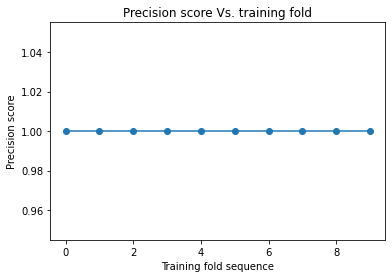

In [37]:
#preset_params
precision_score = []
idx1 = []
skf = StratifiedKFold(n_splits=10)
for idx,(train_idx,test_idx) in enumerate(skf.split(X1,Y1)):
    print("="*12+"Training fold {}".format(idx)+"="*12)
    X2_train,X2_test = X1.iloc[train_idx,:],X1.iloc[test_idx,:]
    Y2_train,Y2_test = Y1.iloc[train_idx],Y1.iloc[test_idx]
    start = datetime.now()
    svm = SVC(**preset_params)
    svm.fit(X2_train,Y2_train)
    y_pred = svm.predict(X2_test)
    precision=metrics.precision_score(Y2_test,y_pred)
    precision_score.append(precision)
    idx1.append(idx)
    runtime = datetime.now() - start
    print("Fold {} finished with score: {} in {} seconds.\n".format(idx,np.round(precision,5),np.round(runtime.total_seconds(),2)))
Avg_precision_score = np.mean(precision_score)
print("="*24)
print("Average precision score is {}".format(Avg_precision_score))
plt.plot(idx1,precision_score,marker='o')
plt.title('Precision score Vs. training fold')
plt.xlabel('Training fold sequence')
plt.ylabel('Precision score')
plt.show()

### Hyperparameter tuning

In [22]:
def objective(trial):
    C=trial.suggest_float("C",0.01,20,step=0.5)
    gamma=trial.suggest_float("gamma",0.01,20,log=True)
    kernel=trial.suggest_categorical("kernel",['rbf','poly','sigmoid'])                                           
    skf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
    cv_scores = []
    for (train_idx,test_idx) in (skf.split(X1,Y1)):
      X_train,Y_train = X1.iloc[train_idx],Y1.iloc[train_idx]
      X_test,Y_test = X1.iloc[test_idx],Y1.iloc[test_idx]
      svm = SVC(C=C,gamma=gamma,kernel=kernel)
      svm.fit(X_train,Y_train)
      preds = svm.predict(X_test)
      precision=metrics.precision_score(Y_test,preds)
      cv_scores.append(precision)
    return np.mean(cv_scores)

In [23]:
study_svm = optuna.create_study(direction="maximize",study_name="max-precision")

[I 2022-12-02 03:32:51,201] A new study created in memory with name: max-precision


In [ ]:
start = datetime.now()
study_svm.optimize(objective,n_trials=10)

C:\Users\yashs\anaconda3\New folder\lib\site-packages\optuna\distributions.py:545: UserWarning: The distribution is specified by [0.01, 20] and q=0.5, but the range is not divisible by `q`. It will be replaced by [0.01, 19.51].
  warnings.warn(


In [ ]:
time_taken = datetime.now() - start